<a href="https://colab.research.google.com/github/lucabem/CompeticionMineria/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

In [2]:
dataset_url = 'https://github.com/lucabem/CompeticionMineria/blob/main/data/dataset_images.zip?raw=true'
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='train_data', 
                                   extract=True)

In [8]:
!rm -rf /root/.keras/datasets/train_data.tar.gz /root/.keras/datasets/train_data
!ls -l /root/.keras/datasets/

total 524
drwxr-xr-x 2 root root 20480 Feb 11 10:14 Broadleaf_Cropland_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:14 Cereal_Cropland_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:03 Close_Shrubland_100_samples
drwxr-xr-x 2 root root 16384 Feb 11 10:03 Continental_Water_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:03 Cropland__with_seasonal_water_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:14 Forest_CDB_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:03 Forest_CDN_100_samples
drwxr-xr-x 2 root root 16384 Feb 11 10:03 Forest_CEB_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:03 Forest_CEN_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:03 Forest_DDB_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:03 Forest_DDN_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:03 Forest_DEB_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 10:03 Forest_DEN_100_samples
drwxr-xr-x 2 root root 16384 Feb 11 10:03 Forest_ODB_100_samples
drwxr-xr-x 2 root root 20480 Feb 11 

In [7]:
train_path = pathlib.Path('/root/.keras/datasets/ImagesTrain')
image_count = len(list(train_path.glob('*/*.jpg')))
print(image_count)

2800


In [32]:
for direct in train_path.iterdir():
  if direct.is_dir():
    direct.rename(train_path / direct.name.split(sep='_100')[0])

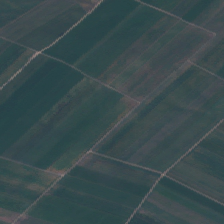

In [5]:
broadleaf_cropland = list(train_path.glob('Broadleaf_Cropland_100_samples/*'))
PIL.Image.open(str(broadleaf_cropland[1]))

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=2021,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2600 files belonging to 26 classes.
Using 2080 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=2021,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2600 files belonging to 26 classes.
Using 520 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Broadleaf_Cropland_100_samples', 'Cereal_Cropland_100_samples', 'Close_Shrubland_100_samples', 'Continental_Water_100_samples', 'Cropland__with_seasonal_water_100_samples', 'Forest_CDB_100_samples', 'Forest_CDN_100_samples', 'Forest_CEB_100_samples', 'Forest_CEN_100_samples', 'Forest_DDB_100_samples', 'Forest_DDN_100_samples', 'Forest_DEB_100_samples', 'Forest_DEN_100_samples', 'Forest_ODB_100_samples', 'Forest_ODN_100_samples', 'Forest_OEB_100_samples', 'Forest_OEN_100_samples', 'Grassland_100_samples', 'Mangrove_100_samples', 'Marine_Water_100_samples', 'Marshland_add_100_samples', 'Moss_and_Lichen_100_samples', 'Open_Shrubland_100_samples', 'Snow_100_samples', 'Swamp_100_samples', 'Urban_100_samples']
